In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import json
import plotly.graph_objects as go
from networkx import edge_betweenness_centrality
from networkx.algorithms.community.centrality import girvan_newman

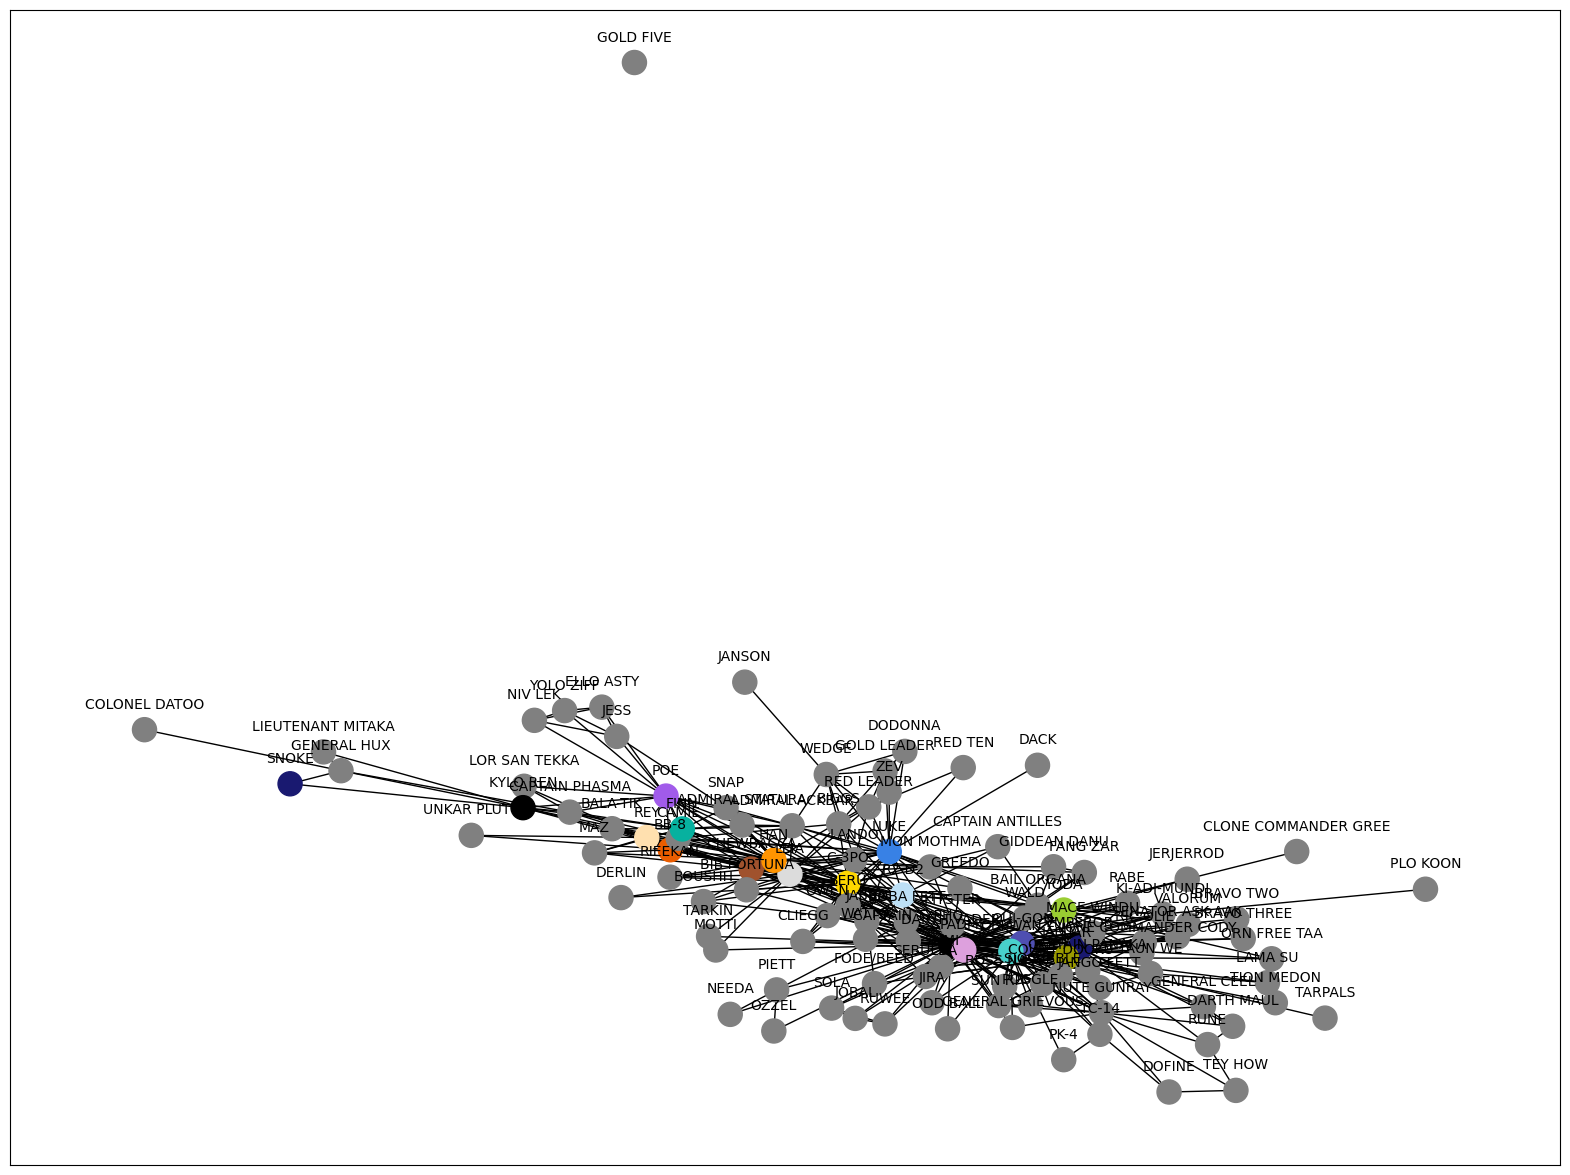

In [27]:
# Create graph
G = nx.Graph()

# Add nodes to the graph with their properties
for node in data['nodes']:
    G.add_node(node['name'], **node)

# Add edges to the graph
for link in data['links']:
    G.add_edge(data['nodes'][link['source']]['name'], data['nodes'][link['target']]['name'], value=link['value'])

# Create a layout for the nodes 
pos = nx.spring_layout(G)

# Increase figure size
plt.figure(figsize=(20, 15))

# Draw nodes with colors specified in the data
nx.draw_networkx_nodes(G, pos, node_color=[node[1].get('colour', '#000000') for node in G.nodes(data=True)])

# Draw edges
nx.draw_networkx_edges(G, pos)

# Adjust label positions and draw labels
label_pos = {node: (pos[node][0], pos[node][1]+0.03) for node in pos}
nx.draw_networkx_labels(G, label_pos, font_color="black", font_size=10)

# Show the graph
plt.show()

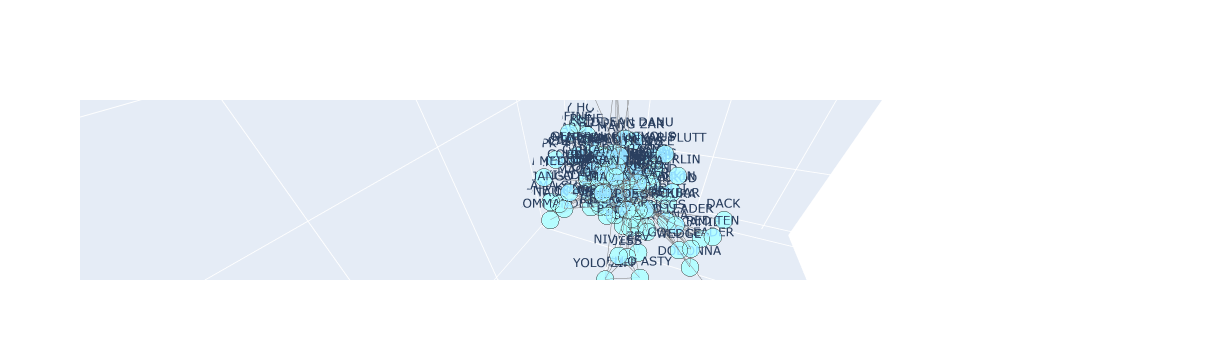

In [22]:
# 3D spring layout
pos = nx.spring_layout(G, dim=3)

# Create trace of the nodes
node_trace = go.Scatter3d(
    x=[pos[k][0] for k in G.nodes],
    y=[pos[k][1] for k in G.nodes],
    z=[pos[k][2] for k in G.nodes],
    mode='markers+text',
    text=list(G.nodes),
    marker=dict(
        size=10,
        color='rgba(135, 206, 235, 0.8)',
        line=dict(
            color='rgb(50,50,50)',
            width=0.5
        )
    ),
    hoverinfo='text'
)

# Create trace of the edges
edge_trace = go.Scatter3d(
    x=sum([[pos[k][0] for k in edge] for edge in G.edges], []),
    y=sum([[pos[k][1] for k in edge] for edge in G.edges], []),
    z=sum([[pos[k][2] for k in edge] for edge in G.edges], []),
    mode='lines',
    line=dict(
        color='rgb(125,125,125)',
        width=1
    ),
    hoverinfo='none'
)

# Create a layout and plot
layout = go.Layout(
    showlegend=False,
    scene=dict(
        xaxis=dict(showspikes=False),
        yaxis=dict(showspikes=False),
        zaxis=dict(showspikes=False)
    )
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

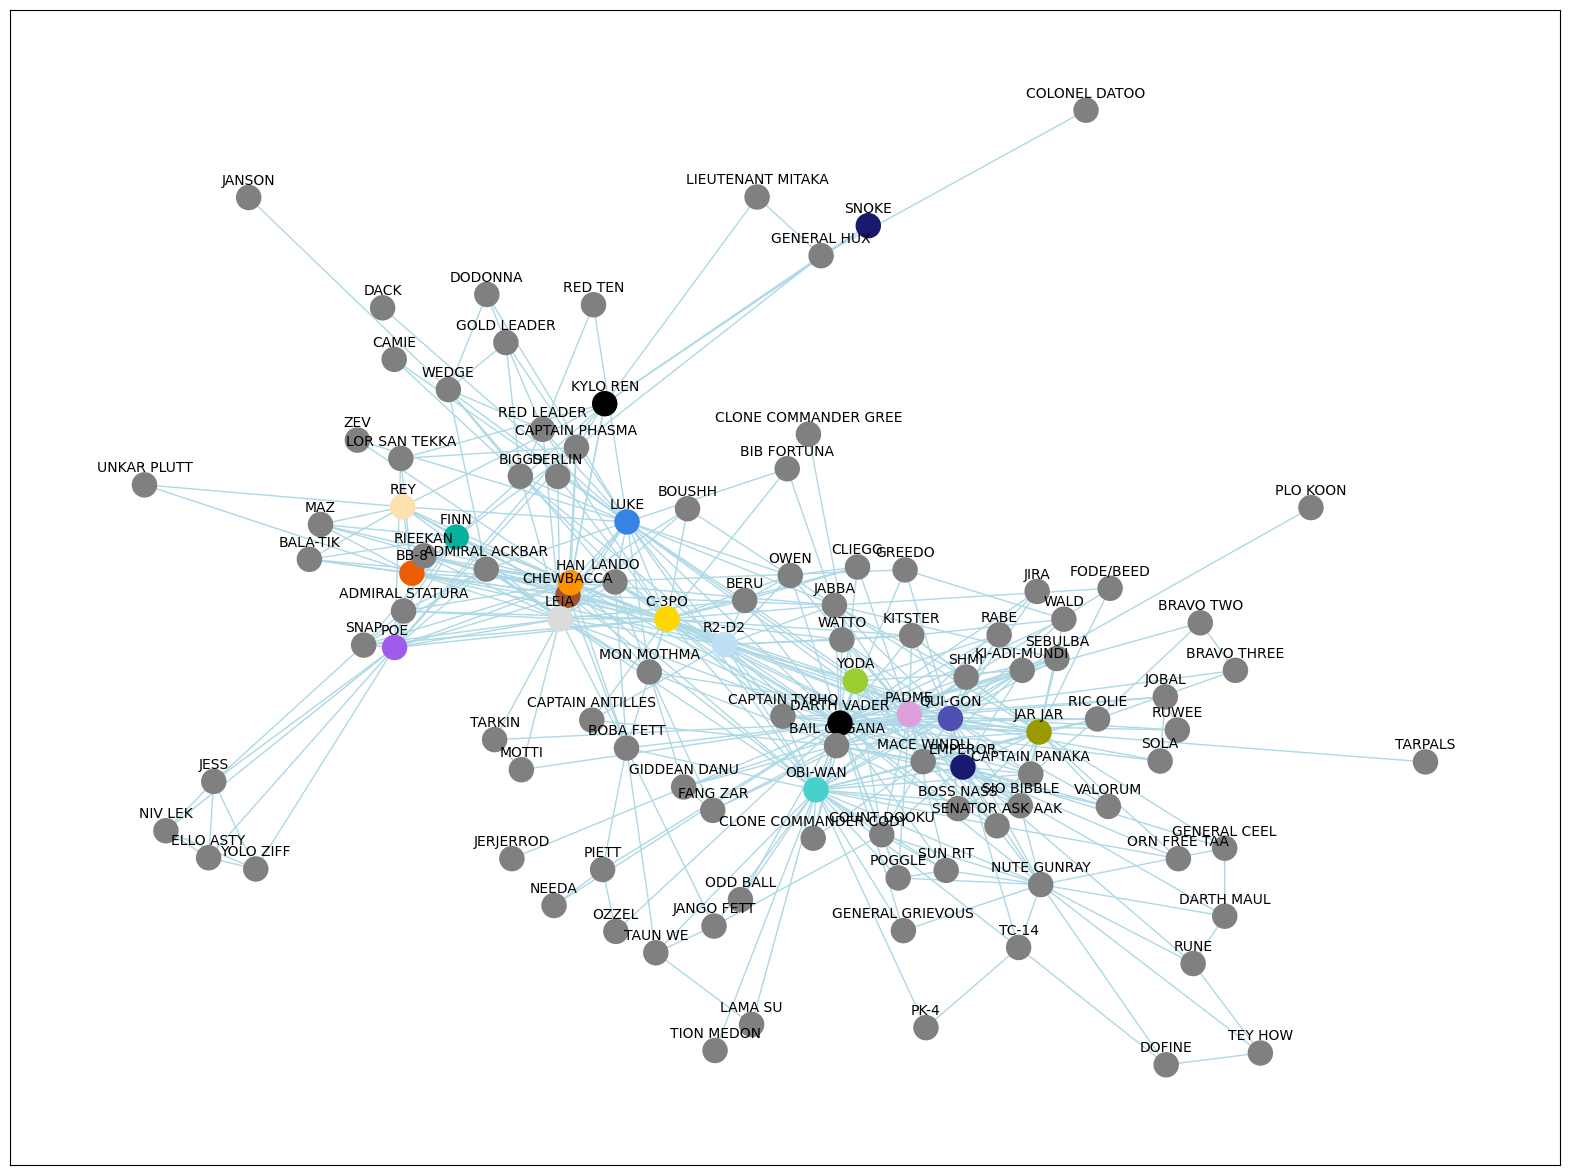

In [31]:
# Load the data
with open("Star Wars Social Network/starwars-full-interactions-allCharacters-mergedJiggy.json") as f:
    data = json.load(f)

# Create graph
G = nx.Graph()

# Add nodes to the graph with their properties
for node in data['nodes']:
    G.add_node(node['name'], **node)

# Add edges to the graph
for link in data['links']:
    G.add_edge(data['nodes'][link['source']]['name'], data['nodes'][link['target']]['name'], value=link['value'])

# Remove the outlier node
if 'GOLD FIVE' in G:
    G.remove_node('GOLD FIVE')

# Create a layout for the nodes 
pos = nx.spring_layout(G)

# Increase figure size
plt.figure(figsize=(20, 15))

# Draw nodes with colors specified in the data
nx.draw_networkx_nodes(G, pos, node_color=[node[1].get('colour', '#000000') for node in G.nodes(data=True)])

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='lightblue')

# Adjust label positions and draw labels
label_pos = {node: (pos[node][0], pos[node][1]+0.03) for node in pos}
nx.draw_networkx_labels(G, label_pos, font_color="black", font_size=10)

# Show the graph
plt.show()

Community 1: {'JANGO FETT', 'POGGLE', 'NUTE GUNRAY', 'DARTH VADER', 'WALD', 'ODD BALL', 'JERJERROD', 'OZZEL', 'FODE/BEED', 'DOFINE', 'VALORUM', 'PADME', 'BRAVO TWO', 'RUNE', 'PK-4', 'TEY HOW', 'JIRA', 'TC-14', 'GREEDO', 'SIO BIBBLE', 'KITSTER', 'SUN RIT', 'CAPTAIN PANAKA', 'OBI-WAN', 'GENERAL CEEL', 'PIETT', 'EMPEROR', 'TAUN WE', 'SENATOR ASK AAK', 'CLONE COMMANDER CODY', 'ORN FREE TAA', 'RUWEE', 'BAIL ORGANA', 'JAR JAR', 'NEEDA', 'PLO KOON', 'GIDDEAN DANU', 'BOSS NASS', 'QUI-GON', 'KI-ADI-MUNDI', 'GENERAL GRIEVOUS', 'FANG ZAR', 'RABE', 'COUNT DOOKU', 'TION MEDON', 'BRAVO THREE', 'TARPALS', 'RIC OLIE', 'SEBULBA', 'DARTH MAUL', 'JOBAL', 'MACE WINDU', 'CAPTAIN TYPHO', 'WATTO', 'CLONE COMMANDER GREE', 'SHMI', 'YODA', 'LAMA SU', 'SOLA'}
Community 2: {'DODONNA', 'CAPTAIN PHASMA', 'BIGGS', 'BB-8', 'BERU', 'ZEV', 'LANDO', 'BOUSHH', 'OWEN', 'REY', 'UNKAR PLUTT', 'DACK', 'CAPTAIN ANTILLES', 'BOBA FETT', 'DERLIN', 'COLONEL DATOO', 'LUKE', 'LIEUTENANT MITAKA', 'WEDGE', 'ADMIRAL ACKBAR', 'JABBA', 

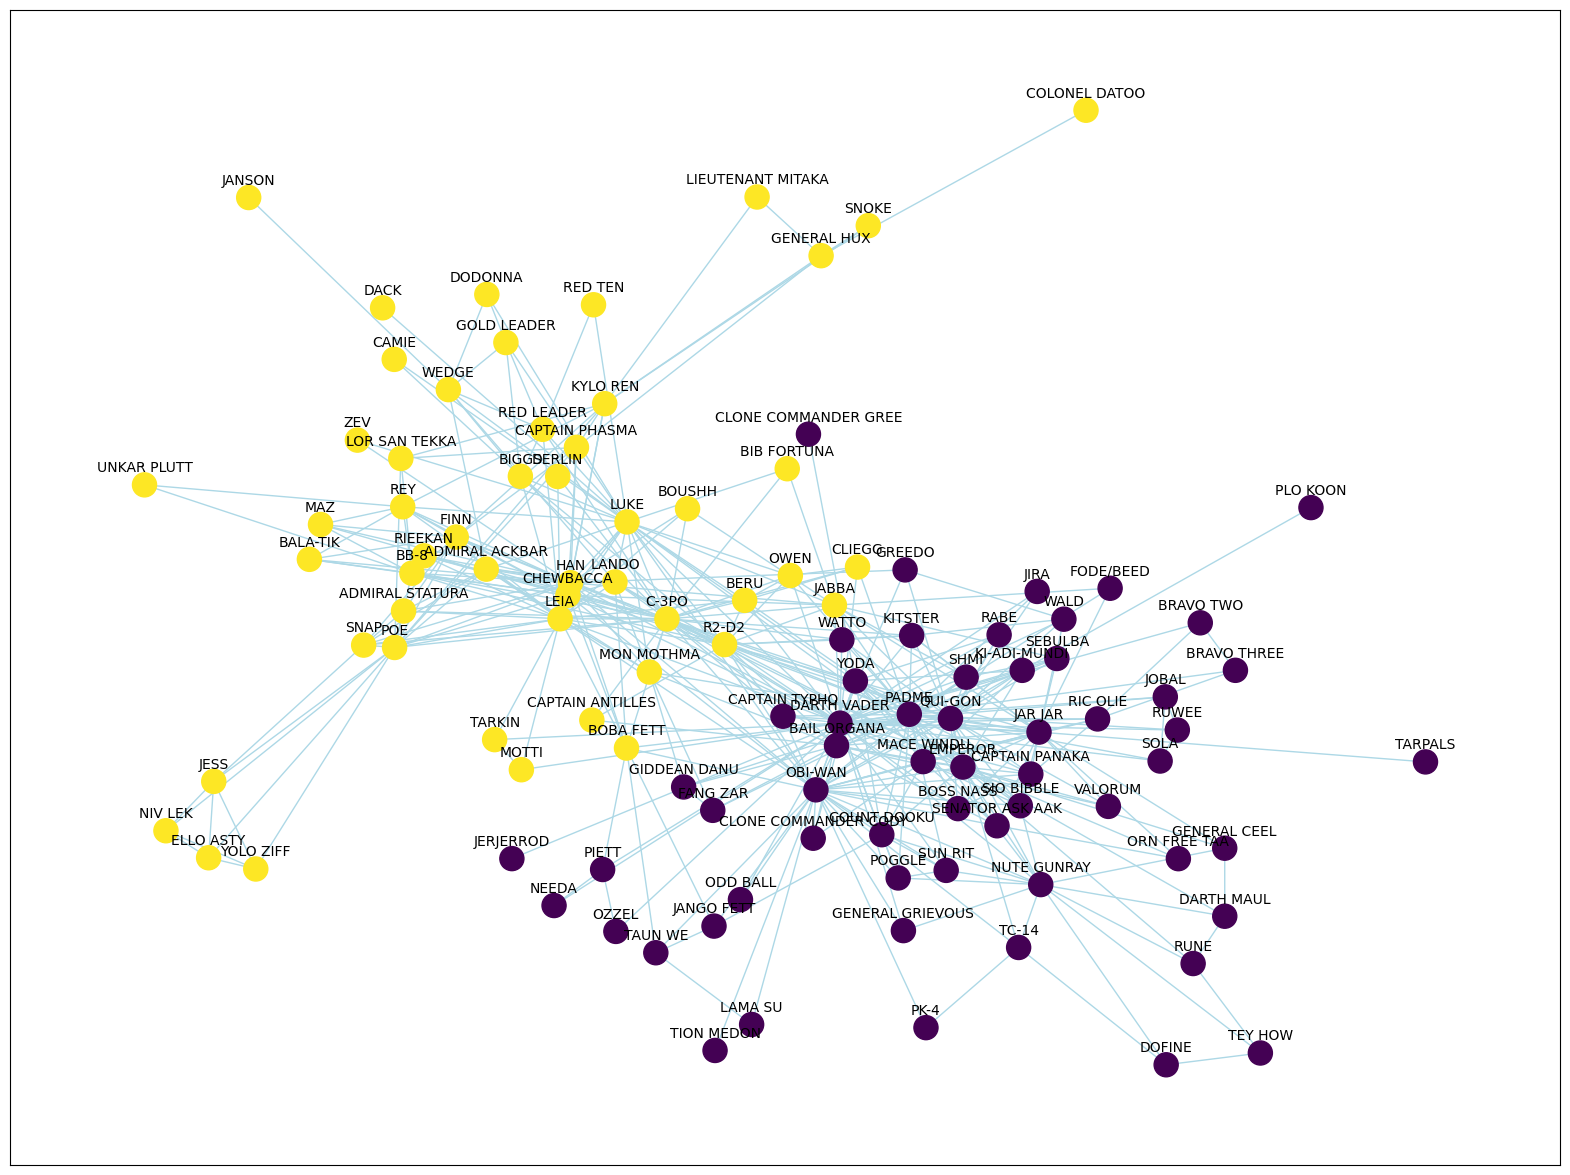

In [33]:
# Compute the best partition using Girvan-Newman algorithm
communities = girvan_newman(G)

# Get the first level of communities (larger values of k result in more and smaller communities)
first_level_communities = next(communities)

# Print out the communities
for i, community in enumerate(first_level_communities):
    print(f"Community {i + 1}: {community}")

# If you want to draw the communities, you can assign different colors to nodes based on their community
community_map = {node: i for i, community in enumerate(first_level_communities) for node in community}
node_colors = [community_map[node] for node in G.nodes()]

# Draw the graph again with node colors based on communities
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, label_pos, font_color="black", font_size=10)
plt.show()

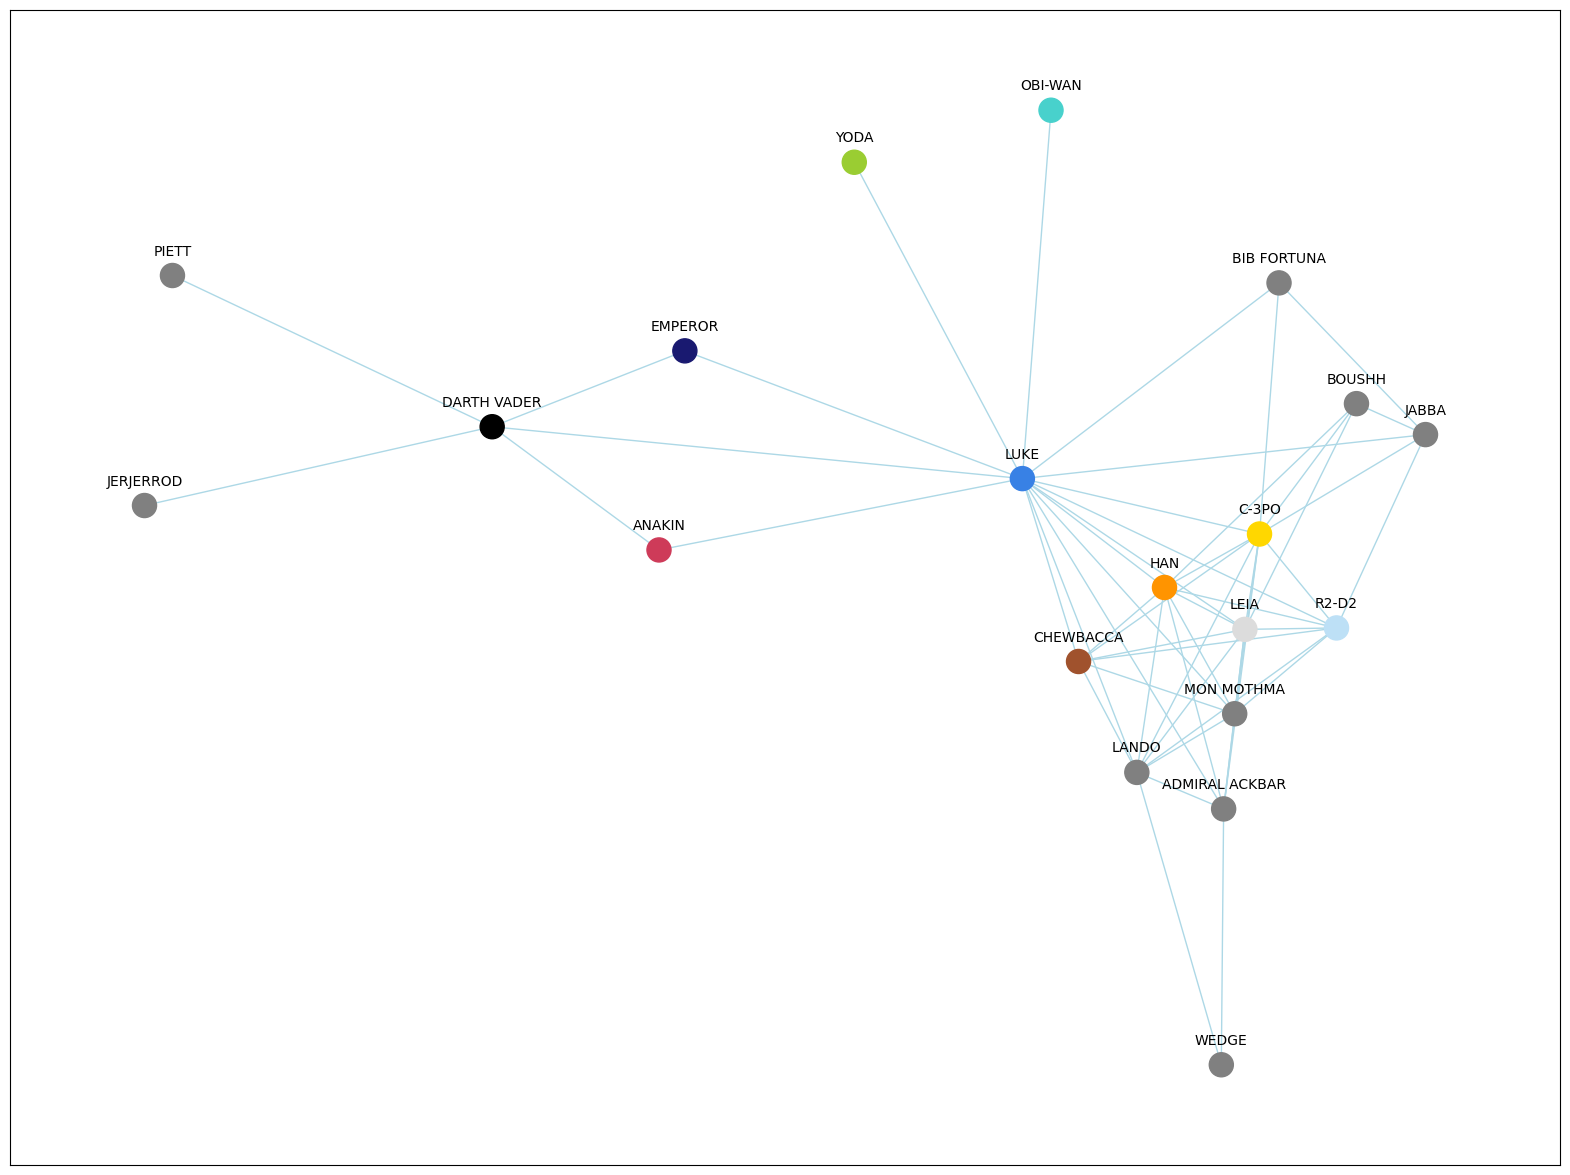

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import json

# Load the data
with open("Star Wars Social Network/starwars-episode-6-interactions-allCharacters.json") as f:
    data = json.load(f)

# Create graph
G = nx.Graph()

# Add nodes to the graph with their properties
for node in data['nodes']:
    G.add_node(node['name'], **node)

# Add edges to the graph
for link in data['links']:
    G.add_edge(data['nodes'][link['source']]['name'], data['nodes'][link['target']]['name'], value=link['value'])
    
# Remove the outlier node
if 'GOLD FIVE' in G:
    G.remove_node('GOLD FIVE')

# Create a layout for the nodes 
pos = nx.spring_layout(G)

# Increase figure size
plt.figure(figsize=(20, 15))

# Draw nodes with colors specified in the data
nx.draw_networkx_nodes(G, pos, node_color=[node[1].get('colour', '#000000') for node in G.nodes(data=True)])

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='lightblue')

# Adjust label positions and draw labels
label_pos = {node: (pos[node][0], pos[node][1]+0.03) for node in pos}
nx.draw_networkx_labels(G, label_pos, font_color="black", font_size=10)

# Show the graph
plt.show()

Community 1: {'R2-D2', 'BOUSHH', 'WEDGE', 'CHEWBACCA', 'BIB FORTUNA', 'LEIA', 'OBI-WAN', 'LUKE', 'YODA', 'JABBA', 'LANDO', 'ADMIRAL ACKBAR', 'MON MOTHMA', 'HAN', 'C-3PO'}
Community 2: {'DARTH VADER', 'PIETT', 'ANAKIN', 'EMPEROR', 'JERJERROD'}


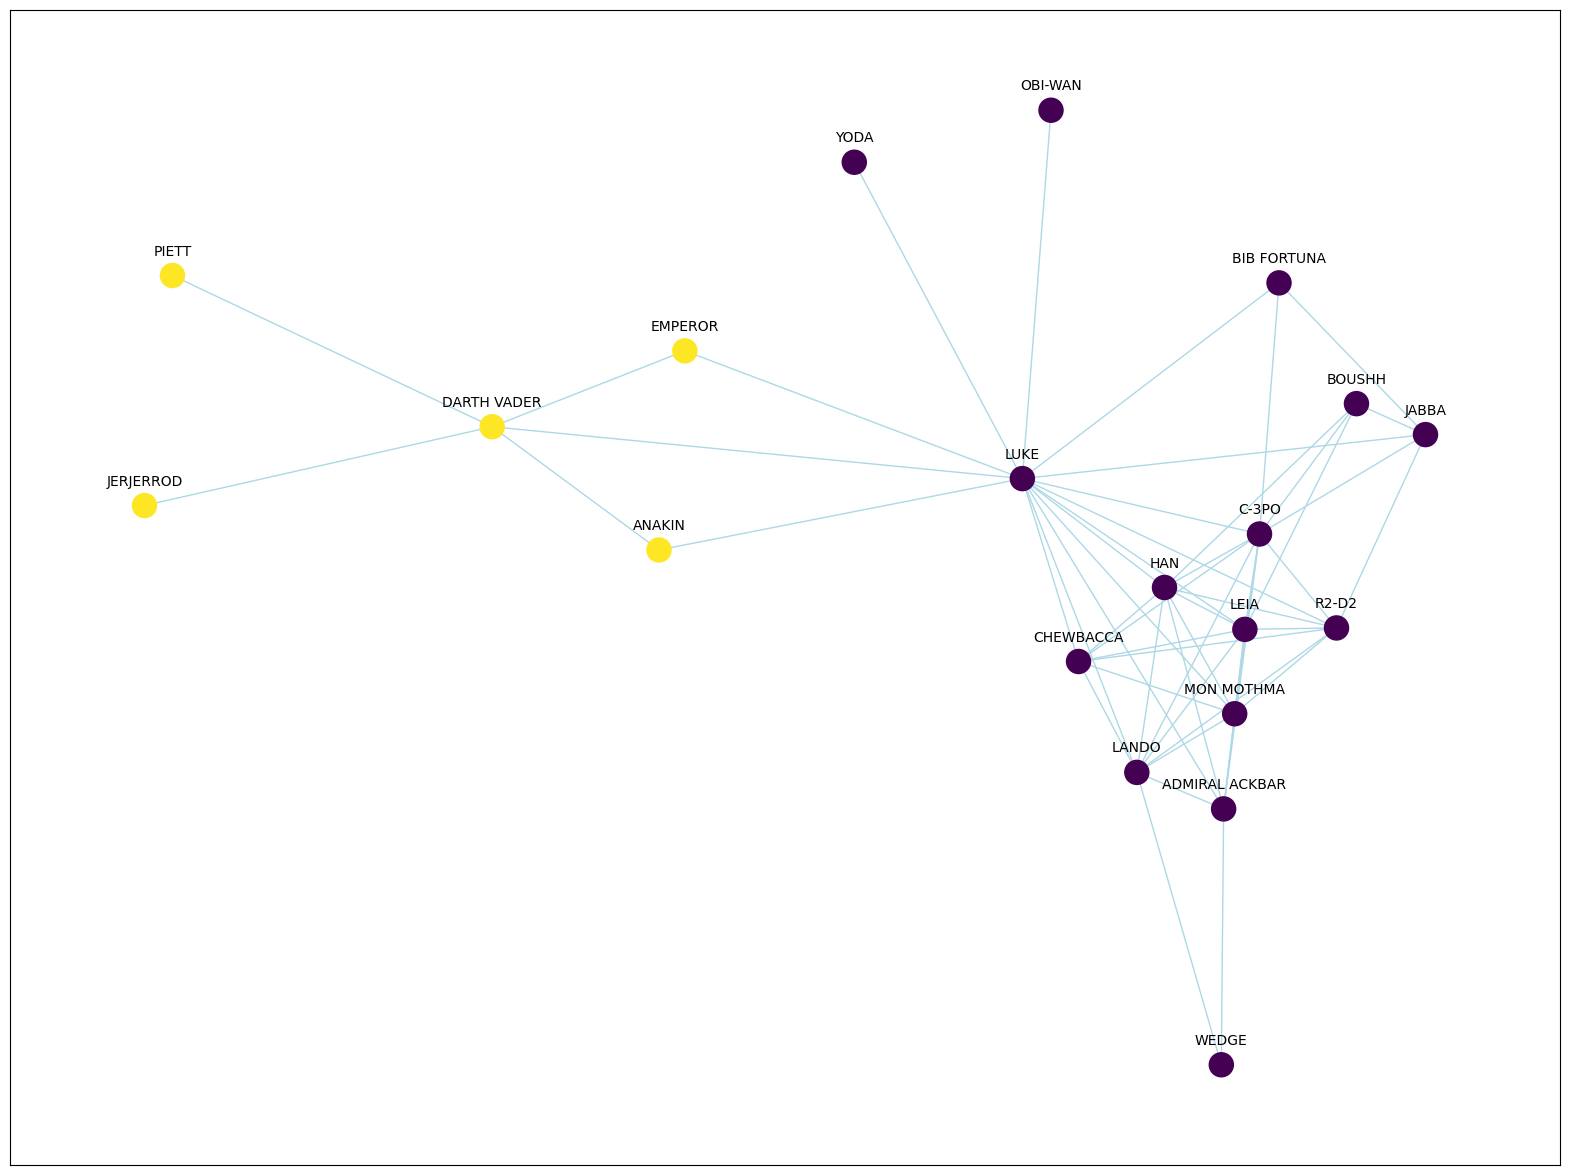

In [17]:
from networkx import edge_betweenness_centrality
from networkx.algorithms.community.centrality import girvan_newman

# Compute the best partition using Girvan-Newman algorithm
communities = girvan_newman(G)

# Get the first level of communities (larger values of k result in more and smaller communities)
first_level_communities = next(communities)

# Print out the communities
for i, community in enumerate(first_level_communities):
    print(f"Community {i + 1}: {community}")

# If you want to draw the communities, you can assign different colors to nodes based on their community
community_map = {node: i for i, community in enumerate(first_level_communities) for node in community}
node_colors = [community_map[node] for node in G.nodes()]

# Draw the graph again with node colors based on communities
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, label_pos, font_color="black", font_size=10)
plt.show()

Community 1: {'R2-D2', 'BOUSHH', 'WEDGE', 'CHEWBACCA', 'BIB FORTUNA', 'LEIA', 'LUKE', 'JABBA', 'LANDO', 'ADMIRAL ACKBAR', 'MON MOTHMA', 'HAN', 'C-3PO'}
Community 2: {'DARTH VADER', 'PIETT', 'ANAKIN', 'EMPEROR', 'JERJERROD'}
Community 3: {'YODA'}
Community 4: {'OBI-WAN'}


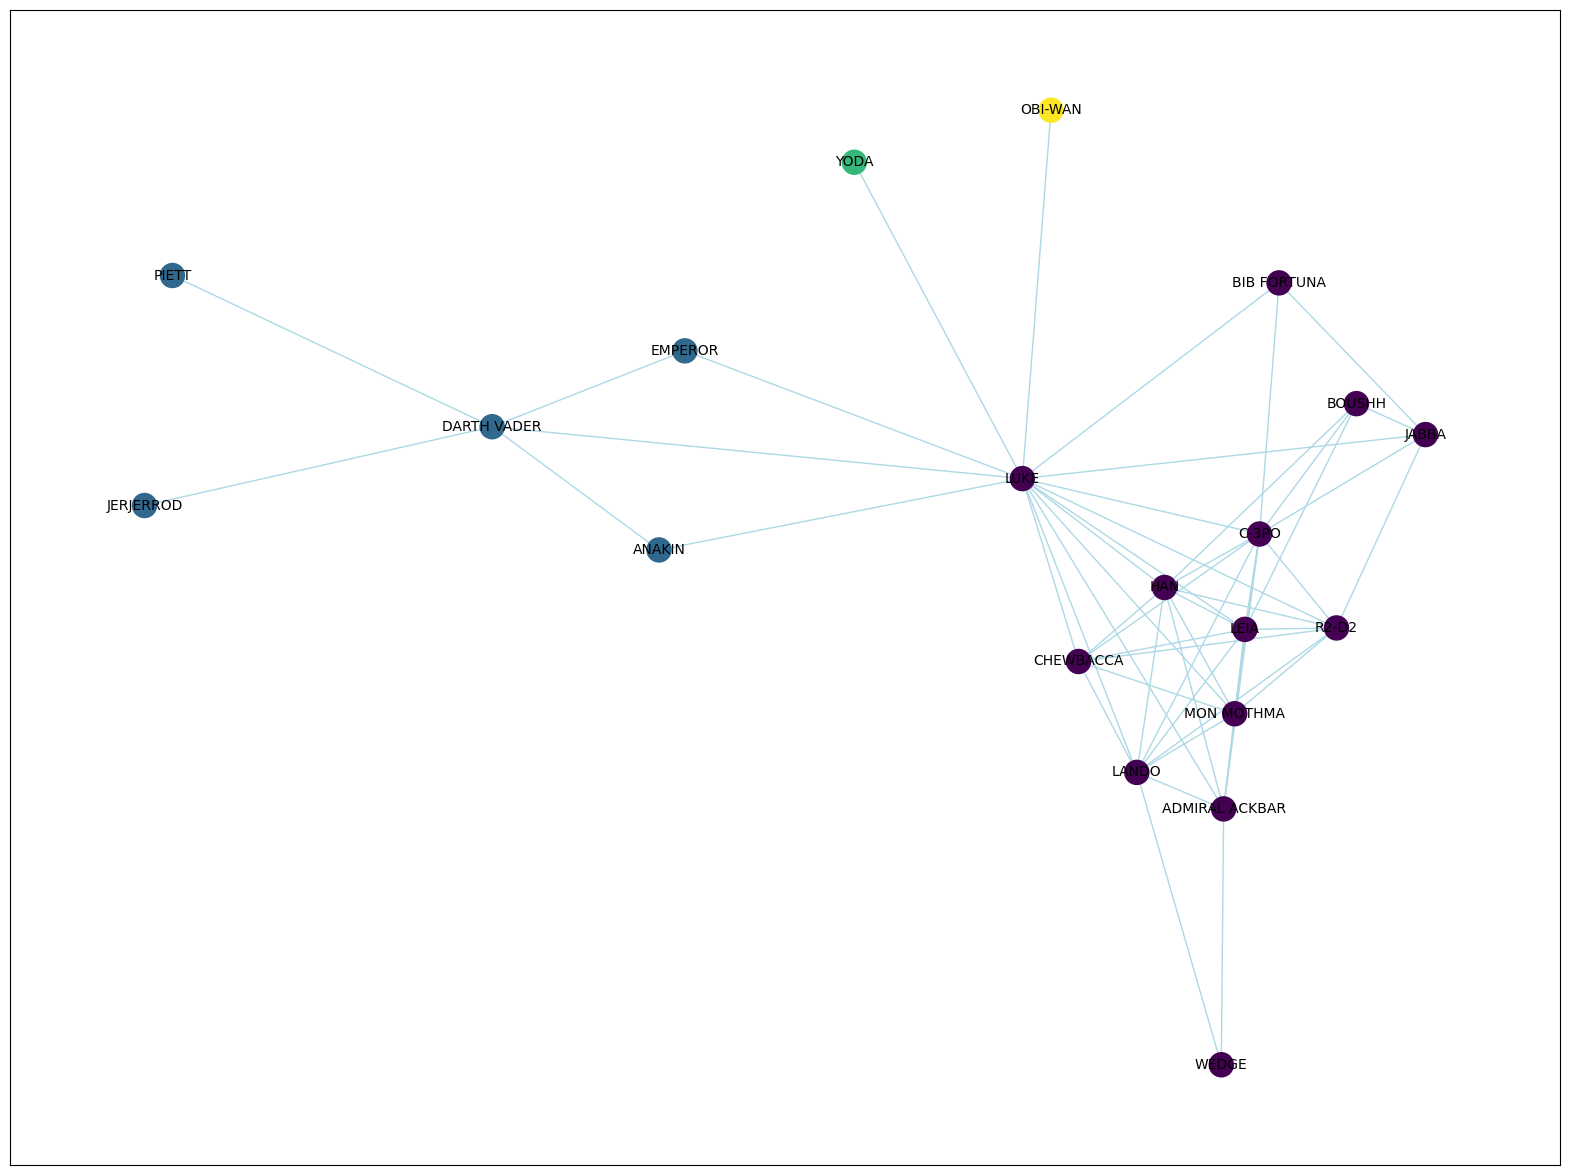

In [18]:
# Compute the best partition using Girvan-Newman algorithm
communities = girvan_newman(G)

# Set the value of k to control the number of communities
k = 3  # Adjust this value to get more or fewer communities

# Get the first level of communities
for i in range(k):
    communities_level = next(communities)

# Print out the communities
for i, community in enumerate(communities_level):
    print(f"Community {i + 1}: {community}")

# If you want to draw the communities, you can assign different colors to nodes based on their community
community_map = {node: i for i, community in enumerate(communities_level) for node in community}
node_colors = [community_map[node] for node in G.nodes()]

# Draw the graph again with node colors based on communities
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_color="black", font_size=10)
plt.show()

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import arff

data, meta = arff.loadarff('final-dataset.arff')
df = pd.DataFrame(data)

In [8]:
df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')

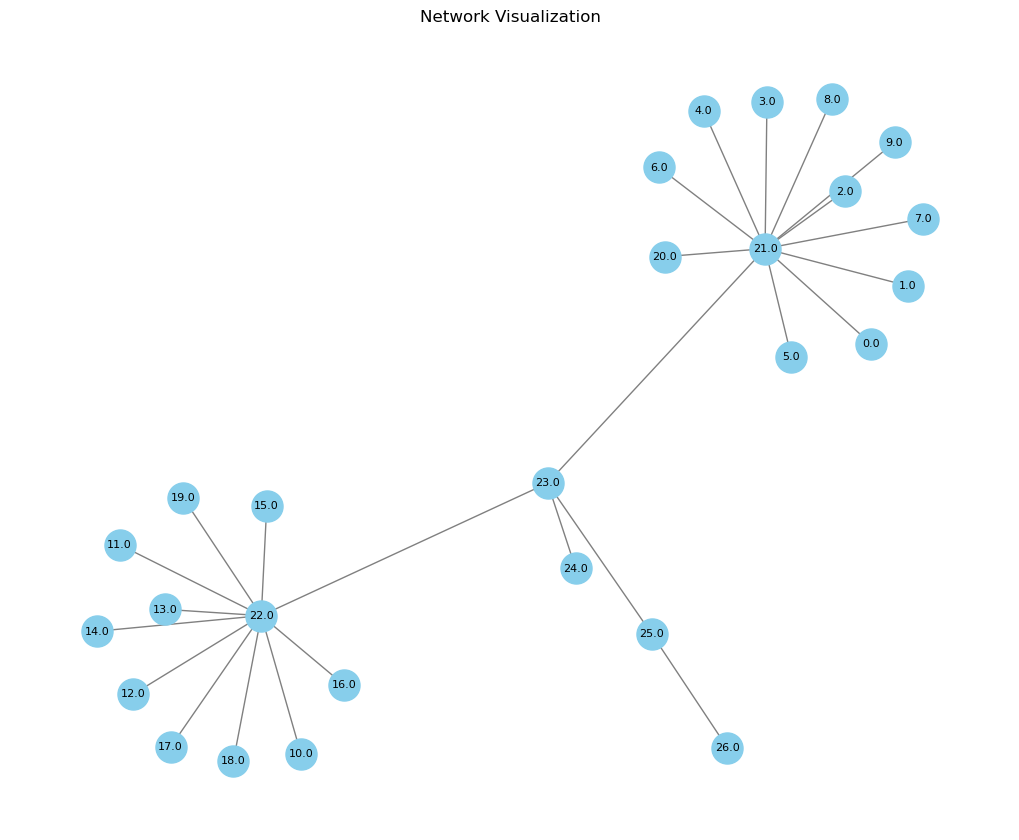

In [9]:
G = nx.Graph()

# Assuming the dataset has 'FROM_NODE' and 'TO_NODE' columns representing the source and target nodes
edges = zip(df['FROM_NODE'], df['TO_NODE'])
G.add_edges_from(edges)

# Step 3: Visualize the Network using Matplotlib
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=8, edge_color='gray')
plt.title("Network Visualization")
plt.show()